<a href="https://colab.research.google.com/github/AnupKumarGupta/Machine-Learning-Lab-Assignments/blob/Logistic-Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd


path = "/content/drive/My Drive/Colab Notebooks/Logistic Regression/column_2C_weka.csv"
dataFrame = pd.read_csv(path,header=None)

### **Dataset borrowed from**
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]

Link to the dataset [Vertebral Column Data Set](http://archive.ics.uci.edu/ml/datasets/vertebral+column)

####  pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis

In [0]:
# Renaming the columns
dataFrame.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
              'grade_of_spondylolisthesis','vertebral_column']

In [0]:
from sklearn import preprocessing

# Getting the unique values of labels
uniqueLabels = list(dataFrame['vertebral_column'].unique())
labelEncoders = preprocessing.LabelEncoder()
labelEncoders.fit(uniqueLabels)
dataFrame['vertebral_column'] = pd.DataFrame(labelEncoders.transform(dataFrame['vertebral_column'].values.ravel()))

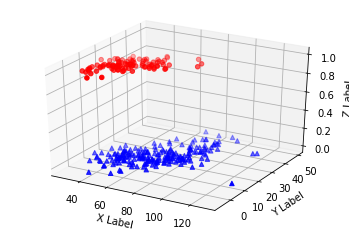

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

positiveDataSamples = dataFrame[dataFrame.iloc[:, 6] == 1]
negativeDataSamples = dataFrame[dataFrame.iloc[:, 6] == 0]

ax.scatter(positiveDataSamples['pelvic_incidence'], positiveDataSamples['pelvic_tilt'], positiveDataSamples['vertebral_column'], c='r', marker='o')
ax.scatter(negativeDataSamples['pelvic_incidence'], negativeDataSamples['pelvic_tilt'], negativeDataSamples['vertebral_column'], c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [0]:
# Splitting dataFrame into X (features) and Y (labels) 
X = dataFrame.iloc[:,0:5]
Y = dataFrame.iloc[:,6:]

# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)